In [1]:
import os
import keras
import numpy as np
from keras import layers
from keras.layers import Input
from keras.models import Model
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD
from IPython.display import SVG
from keras.utils import plot_model
from keras.layers import Flatten, Dense
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.vis_utils import model_to_dot
from keras.layers import Input,Dense,Convolution2D,Activation,MaxPooling2D,Flatten,merge
from keras.layers.merge import add
from keras.layers.convolutional import Deconv2D as Conv2DTranspose

/home/wazir/.virtualenvs/cv/local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


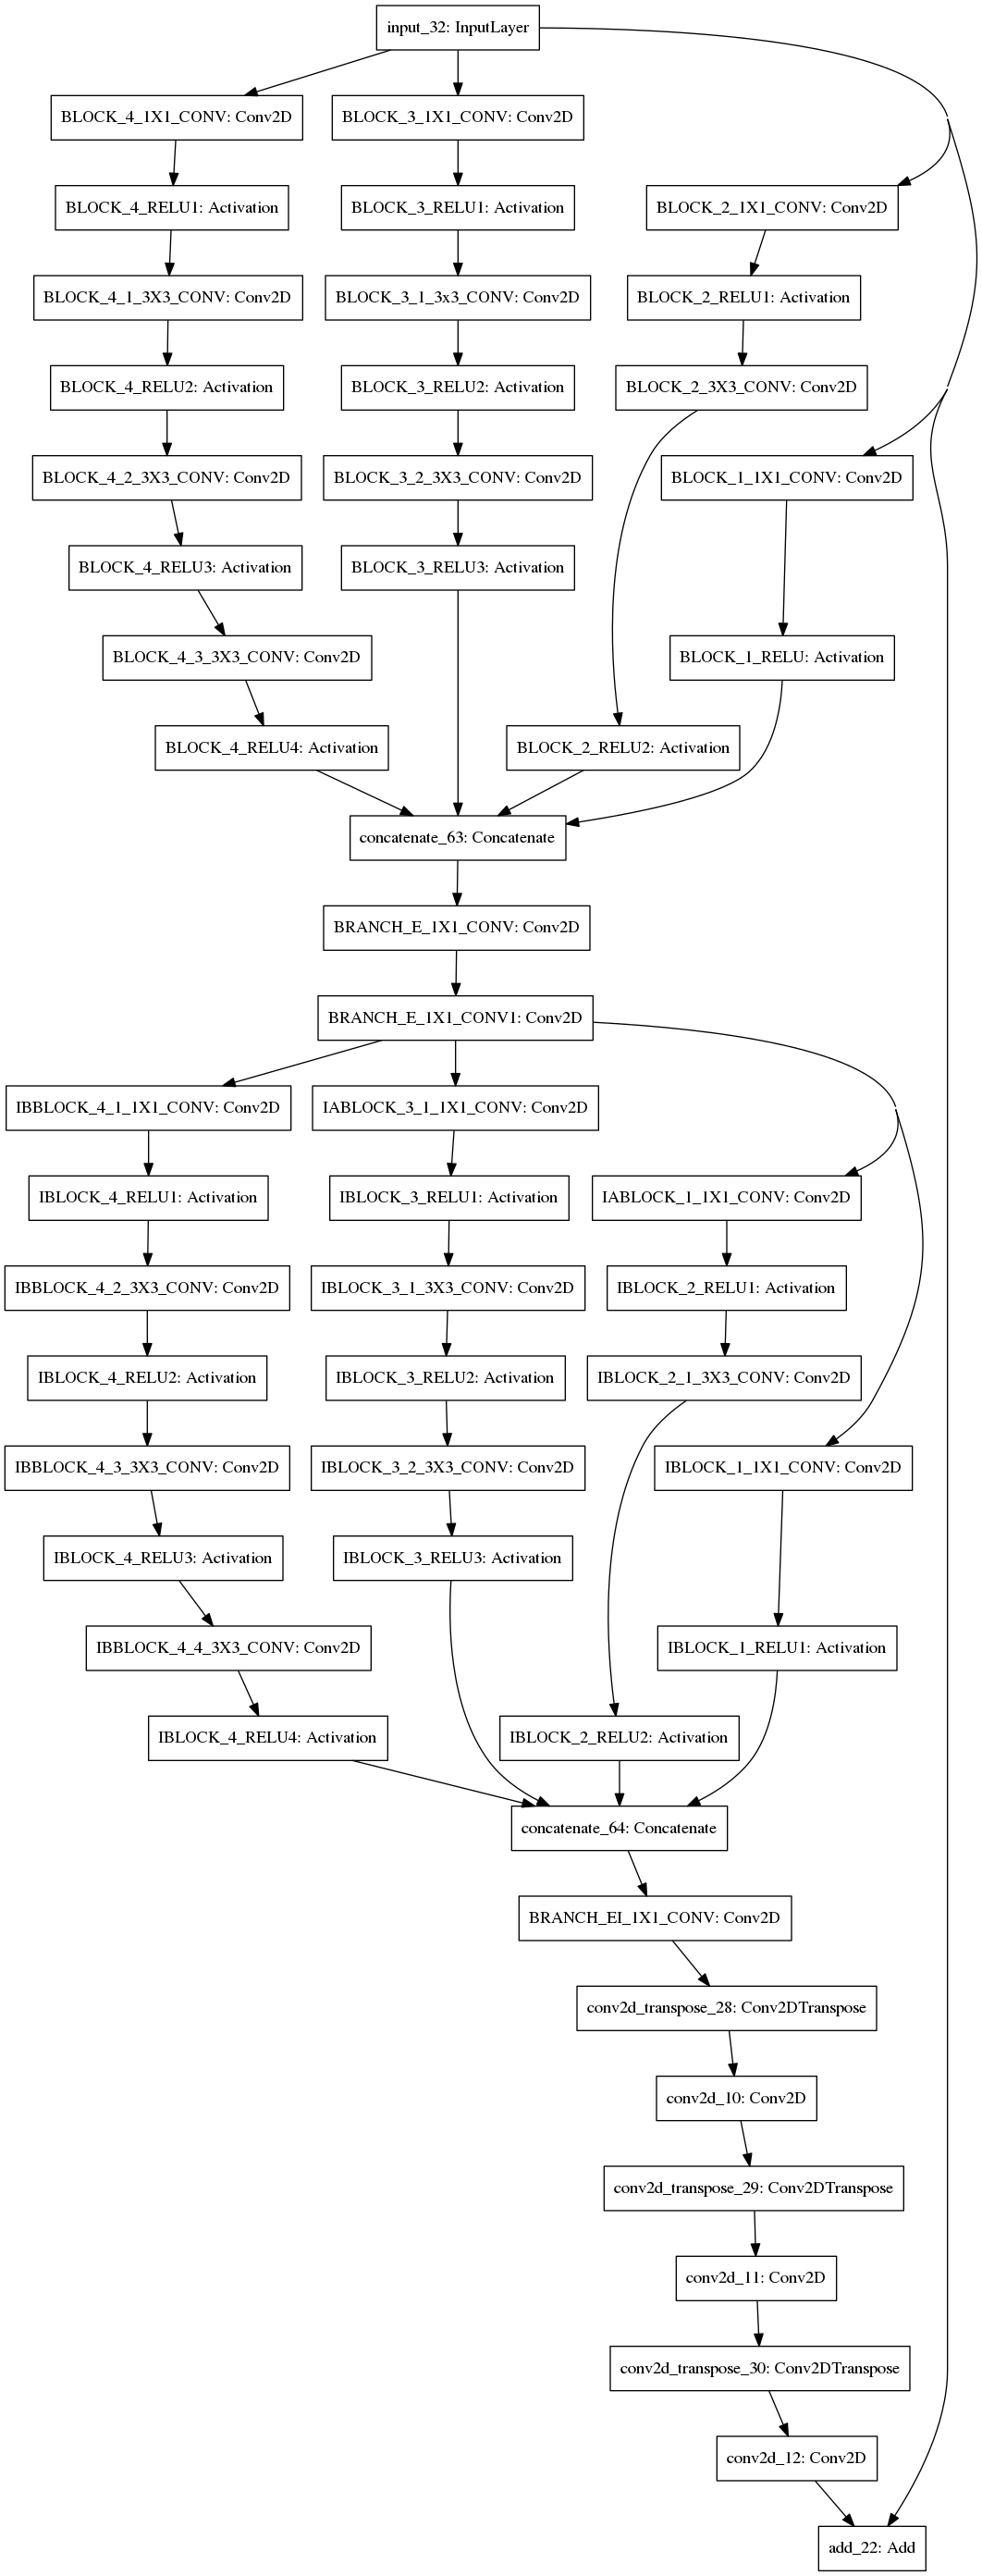

In [2]:
from IPython.display import Image
Image('FSRCNN USES 8 LAYERS.png')

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
def preprocess(img_matrix):
    return np.expand_dims(img_matrix, axis=-1).astype('float32') / 255

In [5]:
train_images = preprocess(train_images)
test_images = preprocess(test_images)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
input_img = Input(shape=(28, 28, 1))
#BLOCK-1
B1C = Conv2D(64, (1,1), padding='same', activation='relu',name='BLOCK_1_1X1_CONV')(input_img)
B1A = Activation('relu',name='BLOCK_1_RELU')(B1C)
#BLOCK-2
B2C = Conv2D(64, (1,1), padding='same', name='BLOCK_2_1X1_CONV')(input_img)
B2A= Activation('relu',name='BLOCK_2_RELU1')(B2C)
B22C = Conv2D(64, (3,3), padding='same', name='BLOCK_2_3X3_CONV')(B2A)
B22A= Activation('relu',name='BLOCK_2_RELU2')(B22C)

#BLOCK-3
B31C = Conv2D(64, (1,1), padding='same', name='BLOCK_3_1X1_CONV')(input_img)
B31A = Activation('relu',name='BLOCK_3_RELU1')(B31C)
B32C = Conv2D(64, (3,3), padding='same',name='BLOCK_3_1_3x3_CONV')(B31A)
B32A = Activation('relu',name='BLOCK_3_RELU2')(B32C)
B33C = Conv2D(64, (3,3), padding='same',name='BLOCK_3_2_3X3_CONV')(B32A)
B33A = Activation('relu',name='BLOCK_3_RELU3')(B33C)



#BLOCK-4
B41C = Conv2D(64, (1,1), padding='same', name='BLOCK_4_1X1_CONV')(input_img)
B41A = Activation('relu',name='BLOCK_4_RELU1')(B41C)
B42C = Conv2D(64, (3,3), padding='same',name='BLOCK_4_1_3X3_CONV')(B41A)
B42A = Activation('relu',name='BLOCK_4_RELU2')(B42C)
B43C = Conv2D(64, (3,3), padding='same',name='BLOCK_4_2_3X3_CONV')(B42A)
B43A = Activation('relu',name='BLOCK_4_RELU3')(B43C)
B44C = Conv2D(64, (3,3), padding='same',name='BLOCK_4_3_3X3_CONV')(B43A)
B44A = Activation('relu',name='BLOCK_4_RELU4')(B44C)
# concatenation
Filter_Concatenate = keras.layers.concatenate([B1A,B22A,B33A,B44A], axis = 3)
E = Conv2D(64, (1,1), padding='same', name='BRANCH_E_1X1_CONV')(Filter_Concatenate)
F = Conv2D(64, (1,1), padding='same', name='BRANCH_E_1X1_CONV1')(E)
##########
#BLOCK-1
BIC = Conv2D(64, (1,1), padding='same', name='IBLOCK_1_1X1_CONV')(F)
BIA = Activation('relu',name='IBLOCK_1_RELU1')(BIC)
#BLOCK-2
BI1C = Conv2D(64, (1,1), padding='same', name='IABLOCK_1_1X1_CONV')(F)
BI1A = Activation('relu',name='IBLOCK_2_RELU1')(BI1C)
BI2C = Conv2D(64, (3,3), padding='same',name='IBLOCK_2_1_3X3_CONV')(BI1A)
BI2A = Activation('relu',name='IBLOCK_2_RELU2')(BI2C)

#BLOCK-3
BI31C = Conv2D(64, (1,1), padding='same', name='IABLOCK_3_1_1X1_CONV')(F)
BI31A = Activation('relu',name='IBLOCK_3_RELU1')(BI31C)
BI32C = Conv2D(64, (3,3), padding='same',name='IBLOCK_3_1_3X3_CONV')(BI31A)
BI32A = Activation('relu',name='IBLOCK_3_RELU2')(BI32C)
BI33C = Conv2D(64, (3,3), padding='same',name='IBLOCK_3_2_3X3_CONV')(BI32A)
BI33A = Activation('relu',name='IBLOCK_3_RELU3')(BI33C)

#BLOCK-4
BI41C = Conv2D(64, (1,1), padding='same', name='IBBLOCK_4_1_1X1_CONV')(F)
BI41A = Activation('relu',name='IBLOCK_4_RELU1')(BI41C)

BI42C = Conv2D(64, (3,3), padding='same', name='IBBLOCK_4_2_3X3_CONV')(BI41A)
BI42A = Activation('relu',name='IBLOCK_4_RELU2')(BI42C)

BI43C = Conv2D(64, (3,3), padding='same', name='IBBLOCK_4_3_3X3_CONV')(BI42A)
BI43A = Activation('relu',name='IBLOCK_4_RELU3')(BI43C)

BI44C = Conv2D(64, (3,3), padding='same', name='IBBLOCK_4_4_3X3_CONV')(BI43A)
BI44A = Activation('relu',name='IBLOCK_4_RELU4')(BI44C)


Filter_Concatenate1 = keras.layers.concatenate([BIA,BI2A,BI33A,BI44A], axis = 3)
G = Conv2D(64, (1,1), padding='same', activation='relu',name='BRANCH_EI_1X1_CONV')(Filter_Concatenate1)

output1 = layers.Flatten()(G)
d1 = Conv2DTranspose(64, (1,1))(G)

C1 = Conv2D(64, (3,3), padding='same')(d1)
d2 = Conv2DTranspose(64, (1,1))(C1)
C2 = Conv2D(64, (3,3), padding='same')(d2)
d3 = Conv2DTranspose(64, (1,1))(C2)
C3 = Conv2D(64, (3,3), padding='same')(d3)
m3 = add([input_img, C3])
model = Model(inputs=input_img, outputs=m3)

In [7]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
BLOCK_4_1X1_CONV (Conv2D)       (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
BLOCK_4_RELU1 (Activation)      (None, 28, 28, 64)   0           BLOCK_4_1X1_CONV[0][0]           
__________________________________________________________________________________________________
BLOCK_3_1X1_CONV (Conv2D)       (None, 28, 28, 64)   128         input_1[0][0]                    
__________________________________________________________________________________________________
BLOCK_4_1_

In [8]:
#SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [9]:
#plot_model(model, to_file='FSRCNN USES 8 LAYERS.png')

In [10]:
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])